### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
# Import pandas, seaborn, numpy, and matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
# Load the data
data = pd.read_csv('data/coupons.csv')

In [4]:
# Sample the first 5 rows of data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Check/count the missing data
missing_data = data.isnull().sum()
missing_data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Drop the car, toCoupon_GEQ5min, and direction_opp columns
data.drop(columns=['car', 'toCoupon_GEQ5min', 'direction_opp'], axis=1, inplace=True)

In [7]:
# Fill in remaining missing data with the column mode
data.fillna(data.mode().iloc[0], inplace=True)

4. What proportion of the total observations chose to accept the coupon?



In [8]:
# Find the proportion of the total observations that chose to accept the coupon
data['Y'].value_counts(normalize=True)[1]*100

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Number of accepted and rejected coupons by type')

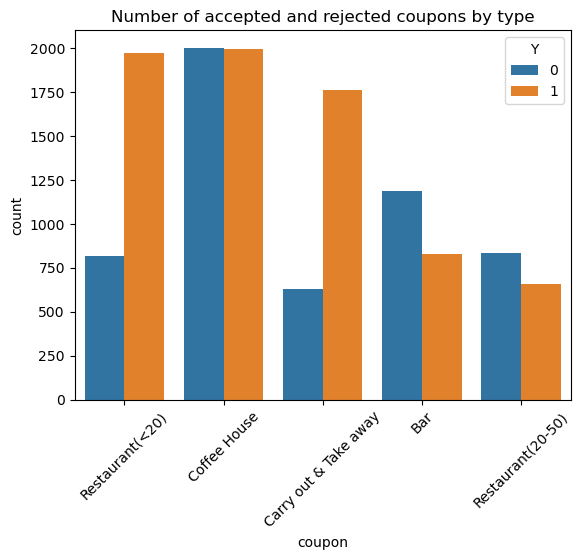

In [9]:
# Visualize the coupon column using a bar plot
sns.countplot(x='coupon', hue='Y', data=data)
plt.xticks(rotation=45)
plt.title('Number of accepted and rejected coupons by type')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Distribution of accepted and rejected coupons based on temperature')

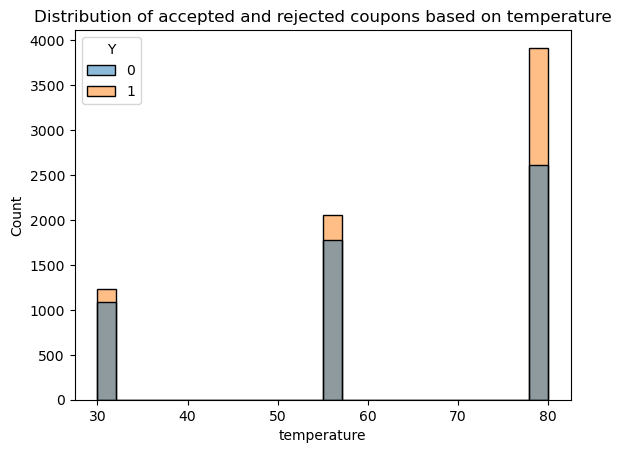

In [10]:
# Visualize the temperature column using a histogram
sns.histplot(x='temperature', hue='Y', data=data)
plt.title('Distribution of accepted and rejected coupons based on temperature')

Text(0.5, 1.0, 'Distribution of accepted and rejected coupons based on weather')

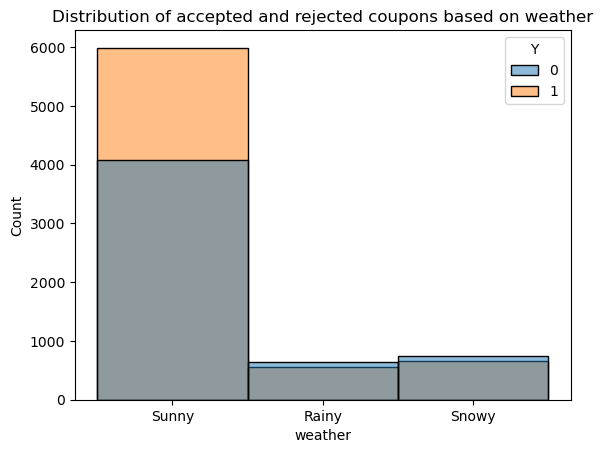

In [11]:
# Visualize the weather column using a histogram
sns.histplot(x='weather', hue='Y', data=data)
plt.title('Distribution of accepted and rejected coupons based on weather')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
# Create a DataFrame containing just the bar coupons
coupons_bar = data.query('coupon == "Bar"')
coupons_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [13]:
# Find the proportion of the accepted bar coupons
coupons_bar['Y'].value_counts(normalize=True)[1]*100

41.00148735746158

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


3 or less:
37.073707370737075
4 or more:
76.88442211055276


Text(0.5, 1.0, 'Number of bar coupons accepted and rejected based on visit frequency')

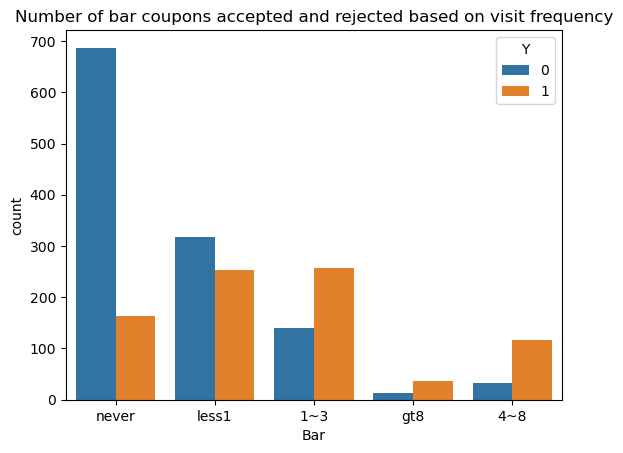

In [14]:
# Compare the acceptance rate of drivers who went to the bar 3 times or fewer to those who went more
bar_3_or_less = coupons_bar.query('(Bar == "never" or Bar == "less1" or Bar == "1~3")')
bar_more_than_3 = coupons_bar.query('(Bar == "4~8" or Bar == "gt8")')
bar_3_or_less_accepted = bar_3_or_less['Y'].value_counts(normalize=True)[1]*100
bar_more_than_3_accepted = bar_more_than_3['Y'].value_counts(normalize=True)[1]*100

# Print acceptance rates
print('3 or less:')
print(bar_3_or_less_accepted)
print('4 or more:')
print(bar_more_than_3_accepted)

# Plot the acceptance of each frequency
sns.countplot(x='Bar', hue='Y', data=coupons_bar)
plt.title('Number of bar coupons accepted and rejected based on visit frequency')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


More than once and above 25
Y
1    0.695238
0    0.304762
Name: proportion, dtype: float64
All Others
Y
0    0.664997
1    0.335003
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Bar coupon acceptance more than once and above 25 to all others')

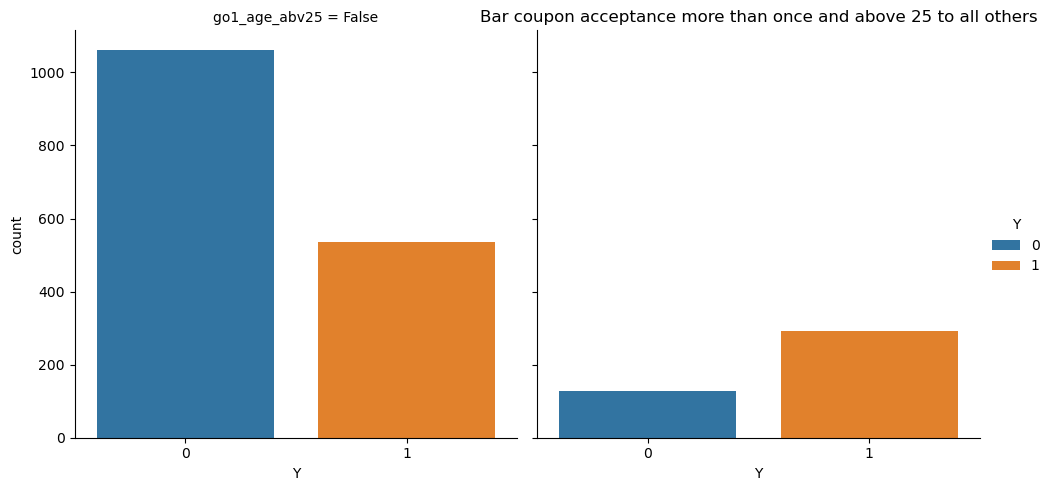

In [15]:
# Compare acceptance of drivers who go to bar more than once and are over age 25 to all others
more_than_once = ['1~3','4~8','gt8']
age_below_25 = ['below21','21']

# Copy the coupons_bar dataframe
bar_go1_above25 = coupons_bar.copy()

# Create a new column to classify people who are above 25 years and go to a bar more than once
bar_go1_above25['go1_age_abv25'] = bar_go1_above25.apply(lambda x: True if (x['Bar'] in (more_than_once)) and (x['age'] not in (age_below_25)) else False, axis=1)

# Acceptance rate more than once and above 25
print('More than once and above 25')
bar_go1_above25_accepted = bar_go1_above25.query('go1_age_abv25 == True')['Y'].value_counts(normalize = True)
print(bar_go1_above25_accepted)
# Acceptance rate all Others
print('All Others')
bar_go1_below25_accepted = bar_go1_above25.query('go1_age_abv25 == False')['Y'].value_counts(normalize = True)
print(bar_go1_below25_accepted)

# Plot data
sns.catplot(x='Y', col='go1_age_abv25', data=bar_go1_above25, kind='count', hue='Y')
plt.title('Bar coupon acceptance more than once and above 25 to all others')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


More than once, no kid, other occupations
Y
1    0.713249
0    0.286751
Name: proportion, dtype: float64
All Others
Y
0    0.703956
1    0.296044
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Bar coupon acceptance more than once, no kid, other occupation to all others')

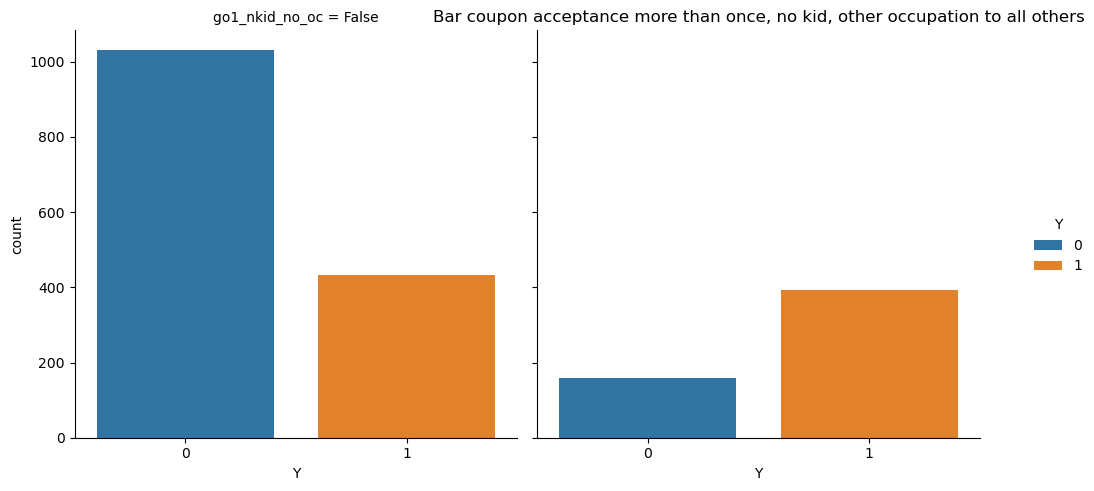

In [16]:
# Compare acceptance of drivers who go to bar more than once, with non kid passengers, and non farming, fishing, or forestry occupations
more_than_once = ['1~3','4~8','gt8']

# Copy the coupons_bar dataframe
bar_no_kid_occupation = coupons_bar.copy()

# Create a new column to classify people who don't have a kid passenger, don't do farming, fishing, or forestery, and go to a bar more than once
bar_no_kid_occupation['go1_nkid_no_oc'] = bar_no_kid_occupation.apply(lambda x: True if (x['Bar'] in (more_than_once)) and (x['passanger'] != 'Kid(s)') and (x['occupation'] != 'Farming Fishing & Forestry') else False, axis=1)

# Acceptance rate more than once, no kid, other occupations
print('More than once, no kid, other occupations')
bar_no_kid_occupation_accepted = bar_no_kid_occupation.query('go1_nkid_no_oc == True')['Y'].value_counts(normalize = True)
print(bar_no_kid_occupation_accepted)
# Acceptance rate all Others
print('All Others')
all_others_accepted = bar_no_kid_occupation.query('go1_nkid_no_oc == False')['Y'].value_counts(normalize = True)
print(all_others_accepted)

# Plot data
sns.catplot(x='Y', col='go1_nkid_no_oc', data=bar_no_kid_occupation, kind='count', hue='Y')
plt.title('Bar coupon acceptance more than once, no kid, other occupation to all others')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



More than 4 times and below $50K
Y
0    0.546512
1    0.453488
Name: proportion, dtype: float64
All Others
Y
0    0.598924
1    0.401076
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Bar coupon acceptance more than 4 times and below $50K to all others')

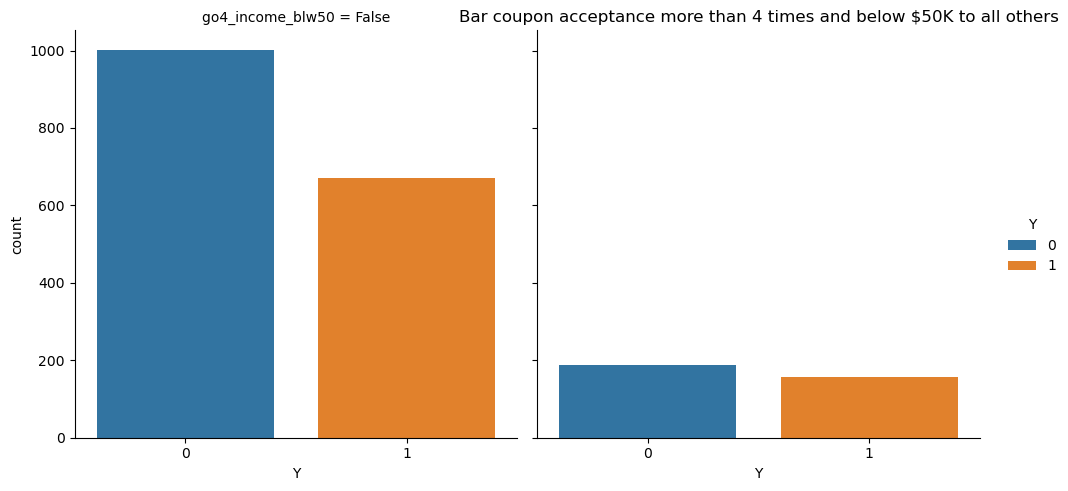

In [17]:
# Compare bar coupon acceptance of drivers who go to cheap restaurants(<$20) more than 4 times and income is less than 50K
more_than_4 = ['4~8','gt8']
less_than_50 = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

# Copy the coupons_bar dataframe
bar_go4_below50 = coupons_bar.copy()

# Create a new column to classify people who go to cheap restaurants more than 4 times and income is less than 50K
bar_go4_below50['go4_income_blw50'] = bar_go4_below50.apply(lambda x: True if (x['RestaurantLessThan20'] in (more_than_4)) and (x['income'] in (less_than_50)) else False, axis=1)

# Acceptance rate more than once and below $50K
print('More than 4 times and below $50K')
bar_go4_below50_accepted = bar_go4_below50.query('go4_income_blw50 == True')['Y'].value_counts(normalize = True)
print(bar_go4_below50_accepted)
# Acceptance rate all Others
print('All Others')
bar_all_others = bar_go4_below50.query('go4_income_blw50 == False')['Y'].value_counts(normalize = True)
print(bar_all_others)

# Plot data
sns.catplot(x='Y', col='go4_income_blw50', data=bar_go4_below50, kind='count', hue='Y')
plt.title('Bar coupon acceptance more than 4 times and below $50K to all others')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [19]:
# Hypothesis: Drivers who accepted the bar coupons are usually those who go to the bar 1-3 times a month, are over 21 years old, have no kid passengers, and have a city-based occupation.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [20]:
# Create a DataFrame containing just the Carry out & Take away coupons
coupons_carry_out = data.query('coupon == "Carry out & Take away"')
coupons_carry_out.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0


In [21]:
# Find the proportion of the accepted carry out coupons
coupons_carry_out['Y'].value_counts(normalize=True)[1]*100

73.54784788967822

3 or less:
72.30527143981116
4 or more:
74.9554367201426


Text(0.5, 1.0, 'Number of Take out coupons accepted and rejected based on visit frequency')

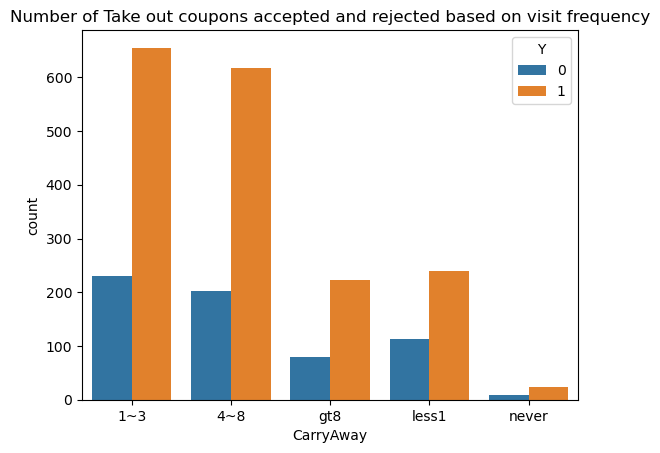

In [22]:
# Compare the acceptance rate of drivers who get take out 3 times or fewer to those who went more
carry_3_or_less = coupons_carry_out.query('(CarryAway == "never" or CarryAway == "less1" or CarryAway == "1~3")')
carry_more_than_3 = coupons_carry_out.query('(CarryAway == "4~8" or CarryAway == "gt8")')
carry_3_or_less_accepted = carry_3_or_less['Y'].value_counts(normalize=True)[1]*100
carry_more_than_3_accepted = carry_more_than_3['Y'].value_counts(normalize=True)[1]*100

# Print acceptance rates
print('3 or less:')
print(carry_3_or_less_accepted)
print('4 or more:')
print(carry_more_than_3_accepted)

# Plot the acceptance of each frequency
sns.countplot(x='CarryAway', hue='Y', data=coupons_carry_out)
plt.title('Number of Take out coupons accepted and rejected based on visit frequency')

More than once and below 50
Y
1    0.75094
0    0.24906
Name: proportion, dtype: float64
All Others
Y
1    0.7231
0    0.2769
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Carry out coupon acceptance more than once and below $50K to all others')

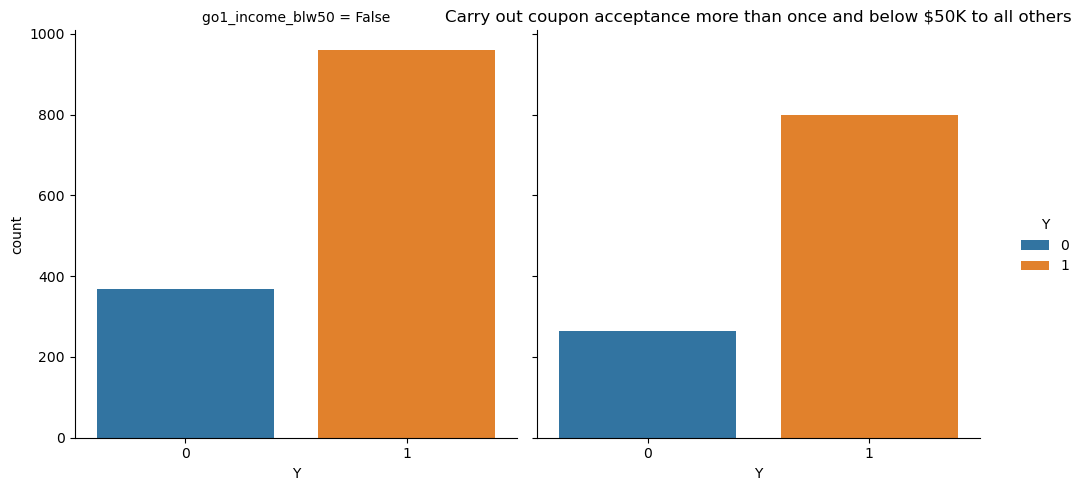

In [24]:
# Compare carry out coupon acceptance of drivers who get take out more than once and income is less than 50K
more_than_1 = ['1~3','4~8','gt8']
less_than_50 = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

# Copy the coupons_carroy_out dataframe
carry_go1_below50 = coupons_carry_out.copy()

# Create a new column to classify people who get take out more than once and have income under $50K
carry_go1_below50['go1_income_blw50'] = carry_go1_below50.apply(lambda x: True if (x['CarryAway'] in (more_than_1)) and (x['income'] in (less_than_50)) else False, axis=1)

# Acceptance rate more than once and below 50
print('More than once and below 50')
carry_go1_below50_accepted = carry_go1_below50.query('go1_income_blw50 == True')['Y'].value_counts(normalize = True)
print(carry_go1_below50_accepted)
# Acceptance rate all Others
print('All Others')
carry_all_others = carry_go1_below50.query('go1_income_blw50 == False')['Y'].value_counts(normalize = True)
print(carry_all_others)

# Plot data
sns.catplot(x='Y', col='go1_income_blw50', data=carry_go1_below50, kind='count', hue='Y')
plt.title('Carry out coupon acceptance more than once and below $50K to all others')

More than once and below 26
Y
1    0.77095
0    0.22905
Name: proportion, dtype: float64
All Others
Y
1    0.732611
0    0.267389
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Carry out coupon acceptance more than once and below 26 to all others')

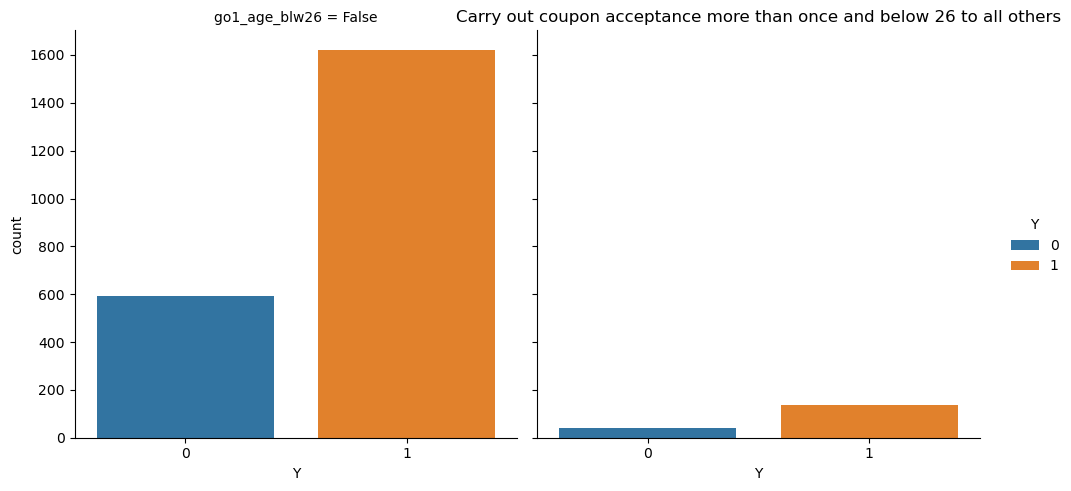

In [25]:
# Compare carry out acceptance of drivers who go to a restaurant priced $20-$50 more than once and are under age 26 to all others
more_than_once = ['1~3','4~8','gt8']
age_below_26 = ['below21','21']

# Copy the coupons_carry_out dataframe
carry_go1_blw26 = coupons_carry_out.copy()

# Create a new column to classify people who are below 26 years and go to a restaurant priced $20-$50 more than once
carry_go1_blw26['go1_age_blw26'] = carry_go1_blw26.apply(lambda x: True if (x['Restaurant20To50'] in (more_than_once)) and (x['age'] in (age_below_26)) else False, axis=1)

# Acceptance rate more than once and below 26
print('More than once and below 26')
carry_go1_blw26_accepted = carry_go1_blw26.query('go1_age_blw26 == True')['Y'].value_counts(normalize = True)
print(carry_go1_blw26_accepted)
# Acceptance rate all Others
print('All Others')
carry_all_others_accepted = carry_go1_blw26.query('go1_age_blw26 == False')['Y'].value_counts(normalize = True)
print(carry_all_others_accepted)

# Plot data
sns.catplot(x='Y', col='go1_age_blw26', data=carry_go1_blw26, kind='count', hue='Y')
plt.title('Carry out coupon acceptance more than once and below 26 to all others')

More than once, with kid, other occupations
Y
1    0.813253
0    0.186747
Name: proportion, dtype: float64
All Others
Y
1    0.71504
0    0.28496
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Carry out coupon acceptance more than once, alone, after noon to all others')

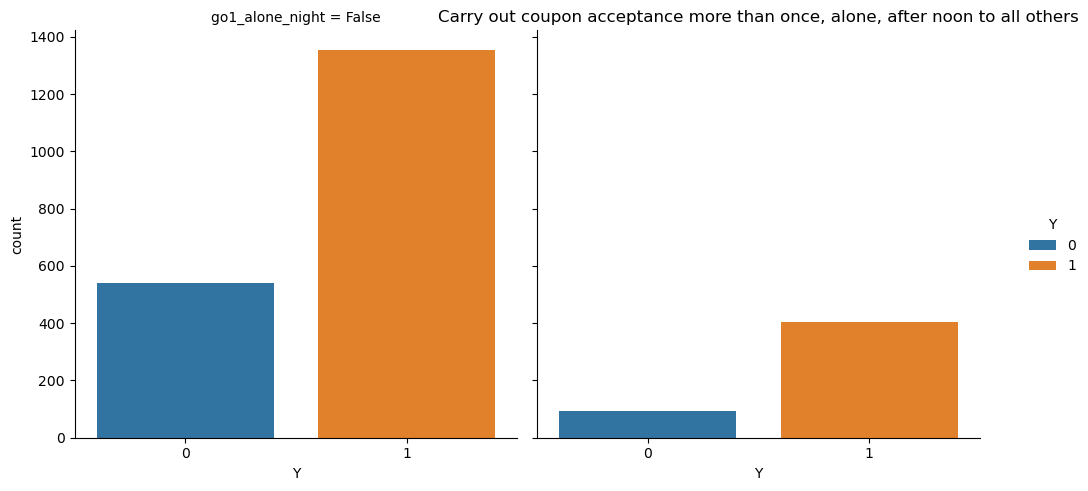

In [26]:
# Compare carry out acceptance of drivers who get take out more than once with no passengers after noon
more_than_once = ['1~3','4~8','gt8']
after_noon = ['2PM', '6PM', '10PM']

# Copy the coupons_carry_out dataframe
carry_alone_night = coupons_carry_out.copy()

# Create a new column to classify people who get take out more than once, alone, after noon
carry_alone_night['go1_alone_night'] = carry_alone_night.apply(lambda x: True if (x['CarryAway'] in (more_than_once)) and (x['passanger'] == 'Alone') and (x['time'] in (after_noon)) else False, axis=1)

# Acceptance rate more than once, alone, after noon
print('More than once, with kid, other occupations')
carry_alone_night_accepted = carry_alone_night.query('go1_alone_night == True')['Y'].value_counts(normalize = True)
print(carry_alone_night_accepted)
# Acceptance rate All Others
print('All Others')
all_others_accepted = carry_alone_night.query('go1_alone_night == False')['Y'].value_counts(normalize = True)
print(all_others_accepted)

# Plot data
sns.catplot(x='Y', col='go1_alone_night', data=carry_alone_night, kind='count', hue='Y')
plt.title('Carry out coupon acceptance more than once, alone, after noon to all others')

In [27]:
#Hypothese: Those who accept take out coupons get take away 1-3 times, are under 26, go to restaurants priced $20-$50, and get lunch or dinner.